In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("shopping_data.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
labels = data['Genre']
print(np.unique(labels.values))

['Female' 'Male']


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])
data['Genre']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Genre, Length: 200, dtype: int32

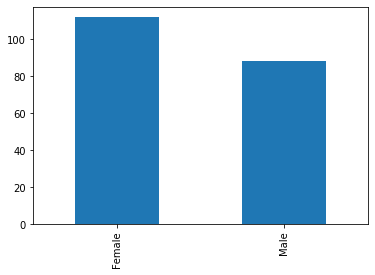

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

fig,ax = plt.subplots()
(labels.value_counts()).plot(ax=ax,kind='bar')

In [7]:
print(data.head())

   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      1   19                  15                      39
1           2      1   21                  15                      81
2           3      0   20                  16                       6
3           4      0   23                  16                      77
4           5      0   31                  17                      40


In [8]:
# from sklearn.preprocessing import StandardScaler
# obj = StandardScaler()
# scale = obj.fit_transform(data.labels)
# data['Genre'] = scaler.fit_transform(data['Genre']).np.array_reshape(-1,1)

In [9]:
features = data.values[:,1:-1]
print(features.shape)

(200, 3)


In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

model = AgglomerativeClustering(n_clusters=7, linkage='average',affinity='cosine')

In [11]:
model.fit(features)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [12]:
model.labels_

array([1, 6, 1, 6, 4, 1, 4, 1, 5, 6, 5, 4, 5, 1, 4, 1, 6, 1, 4, 6, 6, 1,
       4, 1, 4, 1, 6, 1, 6, 3, 4, 3, 6, 2, 6, 2, 1, 3, 1, 2, 6, 2, 1, 3,
       1, 2, 1, 2, 3, 3, 1, 3, 3, 6, 1, 1, 1, 6, 2, 1, 6, 0, 6, 1, 1, 0,
       3, 6, 0, 2, 6, 1, 1, 1, 1, 0, 3, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 0,
       2, 3, 1, 0, 3, 2, 2, 0, 3, 0, 3, 0, 0, 3, 1, 0, 3, 0, 1, 3, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 3, 3, 3, 0, 2, 2, 2, 0, 0, 2, 2, 3, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [13]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [14]:
labels

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

In [15]:
from sklearn.preprocessing import StandardScaler

obj = StandardScaler()
scaler = obj.fit_transform((data.Genre).values.reshape(-1,1))

In [16]:
from sklearn.metrics import mean_squared_error

scores = mean_squared_error(scaler, model.labels_)

In [17]:
abs_err = np.sqrt(scores)

In [18]:
print(scores)

7.325484855826471
